In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
import sklearn.metrics

In [2]:
c_df = pd.read_pickle('./c_df_dummies.pkl')
c_df = c_df.reset_index(drop=True)
c_df.columns

Index(['average_price', 'highest_price', 'lowest_price',
       'ticket_listing_count', 'venue_score', 'performer_genre_alternative',
       'performer_genre_blues', 'performer_genre_country',
       'performer_genre_electronic', 'performer_genre_hip-hop',
       'performer_genre_latin', 'performer_genre_pop', 'performer_genre_rock',
       'performer_genre_soul', 'event_month_02', 'event_month_03',
       'event_month_04', 'event_month_05', 'event_month_06', 'event_month_07',
       'event_month_08', 'event_month_09', 'event_month_10', 'event_month_11',
       'event_month_12', 'event_day_Fri', 'event_day_Mon', 'event_day_Sat',
       'event_day_Sun', 'event_day_Thu', 'event_day_Tue', 'event_day_Wed',
       'time_of_day_afternoon', 'time_of_day_evening', 'wkend_wkday_weekend',
       'event_start_13', 'event_start_14', 'event_start_15', 'event_start_17',
       'event_start_18', 'event_start_19', 'event_start_20', 'event_start_21',
       'event_start_22', 'event_start_23', 'venue_ca

In [3]:
data_log = pd.DataFrame([])

## Ticket Listing Count

/Users/chrischung/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


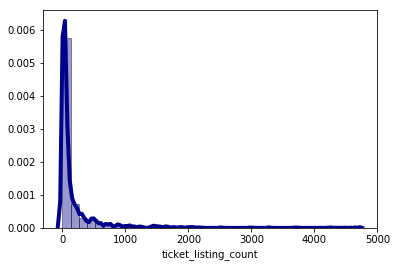

In [4]:
#Before log transforming ticket listing count feature
sns.distplot(c_df['ticket_listing_count'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

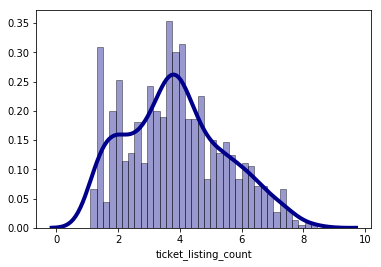

In [5]:
# After log transformed ticket listing count feature
data_log['ticket_listing_count'] = np.log(c_df['ticket_listing_count'])
sns.distplot(data_log['ticket_listing_count'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Lowest Price

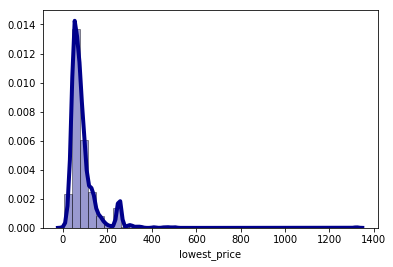

In [6]:
# Pre Log Transformed
sns.distplot(c_df['lowest_price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

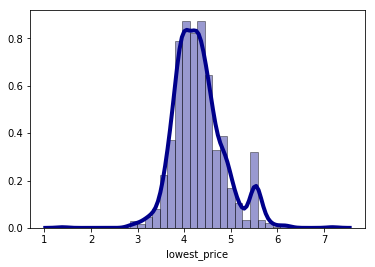

In [7]:
# After log transforming lowest price
data_log['lowest_price'] = np.log(c_df['lowest_price'])
sns.distplot(data_log['lowest_price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Highest Price

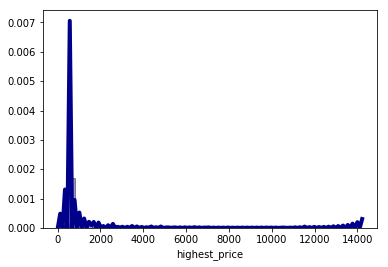

In [8]:
# Before log transforming Highest Price
sns.distplot(c_df['highest_price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

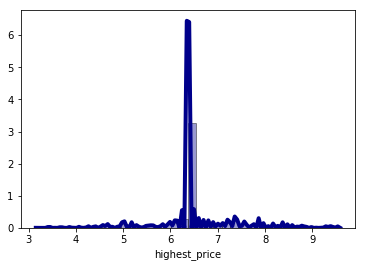

In [9]:
# After log transforming highest price
data_log['highest_price'] = np.log(c_df['highest_price'])
sns.distplot(data_log['highest_price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


## Average Price

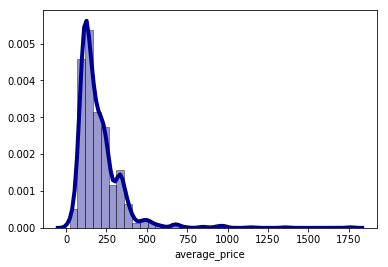

In [10]:
# Before log transforming average price
sns.distplot(c_df['average_price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


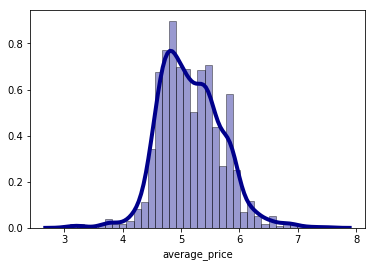

In [11]:
# After log transforming average price
data_log['average_price'] = np.log(c_df['average_price'])
sns.distplot(data_log['average_price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


In [12]:
data_log

,ticket_listing_count,lowest_price,highest_price,average_price
0,1.386294,5.533389,6.369901,5.820083
1,1.386294,5.533389,6.369901,5.820083
2,1.098612,2.995732,3.178054,3.091042
3,1.386294,3.401197,4.382027,3.806662
4,2.302585,4.262680,4.787492,4.521789
5,1.098612,4.276666,4.499810,4.394449
6,2.302585,4.605170,5.176150,4.787492
7,1.945910,3.688879,4.219508,3.912023
8,1.098612,3.401197,3.891820,3.737670
9,2.564949,4.595120,5.170484,4.875197


In [13]:
data_log.to_pickle("./data_log")

^^^^^^^^^^^^ LINE ^^^^^^^^^^^^^^^^^^

In [ ]:
type(normalized_lp)

In [ ]:
c_df_normalized = pd.DataFrame([])

# Normalize lowest_price column
lp_array = np.array(c_df['lowest_price'])
normalized_lp = preprocessing.normalize([lp_array])
c_df_normalized['lowest_price'] = normalized_lp


# Normalize highest_price column
hp_array = np.array(c_df['highest_price'])
normalized_hp = preprocessing.normalize([hp_array])
c_df_normalized['highest_price'] = normalized_hp

# Normalize highest_price column
tlc_array = np.array(c_df['ticket_listing_count'])
normalized_tlc = preprocessing.normalize([tlc_array])
c_df_normalized['ticket_listing_count'] = normalized_tlc

In [ ]:
sns.distplot(normalized_lp)